In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [15]:
def black_scholes_verbose(S, K, T, r, sigma, option_type='call'):
    
    #  d1
    d1_numerator = np.log(S / K) + (r + 0.5 * sigma**2) * T
    d1_denominator = sigma * np.sqrt(T)
    d1 = d1_numerator / d1_denominator
    
    #  d2
    d2 = d1 - sigma * np.sqrt(T)
    
    # Calculate N(d1) and N(d2)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    
    #  option price
    if option_type == 'call':
        option_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    output = {
        'S': S,
        'K': K,
        'T': T,
        'r': r,
        'sigma': sigma,
        'd1_numerator': d1_numerator,
        'd1_denominator': d1_denominator,
        'd1': d1,
        'd2': d2,
        'N(d1)': N_d1,
        'N(d2)': N_d2,
        'option_price': option_price
    }
    
    return output
    

In [16]:
#  parameters
S = 100  # Current price of the asset
K = 120  # Strike price
T = 1    # Time to maturity in years
r = 0.05 # Risk-free interest rate (5%)
sigma = 0.2 # Volatility (20%)

In [17]:
call_output = black_scholes_verbose(S, K, T, r, sigma, option_type='call')


print("Black-Scholes Call Option Calculation:")
print(f"Step 1: d1 numerator = {call_output['d1_numerator']:.4f}")
print(f"       d1 denominator = {call_output['d1_denominator']:.4f}")
print(f"       d1 = {call_output['d1']:.4f}")
print(f"Step 2: d2 = {call_output['d2']:.4f}")
print(f"Step 3: N(d1) = {call_output['N(d1)']:.4f}")
print(f"       N(d2) = {call_output['N(d2)']:.4f}")
print(f"Step 4: Call Option Price = {call_output['option_price']:.2f}")


put_output = black_scholes_verbose(S, K, T, r, sigma, option_type='put')


print("\nBlack-Scholes Put Option Calculation:")
print(f"Step 1: d1 numerator = {put_output['d1_numerator']:.4f}")
print(f"       d1 denominator = {put_output['d1_denominator']:.4f}")
print(f"       d1 = {put_output['d1']:.4f}")
print(f"Step 2: d2 = {put_output['d2']:.4f}")
print(f"Step 3: N(d1) = {put_output['N(d1)']:.4f}")
print(f"       N(d2) = {put_output['N(d2)']:.4f}")
print(f"Step 4: Put Option Price = {put_output['option_price']:.2f}")

Black-Scholes Call Option Calculation:
Step 1: d1 numerator = -0.1123
       d1 denominator = 0.2000
       d1 = -0.5616
Step 2: d2 = -0.7616
Step 3: N(d1) = 0.2872
       N(d2) = 0.2231
Step 4: Call Option Price = 3.25

Black-Scholes Put Option Calculation:
Step 1: d1 numerator = -0.1123
       d1 denominator = 0.2000
       d1 = -0.5616
Step 2: d2 = -0.7616
Step 3: N(d1) = 0.2872
       N(d2) = 0.2231
Step 4: Put Option Price = 17.40


In [18]:
def binomial_options_pricing(S, K, T, r, sigma, option_type='call', steps=100):
   
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    stock_prices = np.zeros((steps + 1, steps + 1))
    option_values = np.zeros((steps + 1, steps + 1))
    
    for j in range(steps + 1):
        for i in range(j + 1):
            stock_prices[i, j] = S * (u ** (j - i)) * (d ** i)
    
    # option values at maturity
    if option_type == 'call':
        option_values[:, steps] = np.maximum(stock_prices[:, steps] - K, 0)
    elif option_type == 'put':
        option_values[:, steps] = np.maximum(K - stock_prices[:, steps], 0)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    # Backward induction 
    for j in range(steps - 1, -1, -1):
        for i in range(j + 1):
            option_values[i, j] = np.exp(-r * dt) * (p * option_values[i, j + 1] + (1 - p) * option_values[i + 1, j + 1])
    
    return option_values[0, 0]

In [19]:
S_range = np.linspace(50, 150, 101)  # Range of asset prices 
K = 100   # Strike price
T = 1     # Time to maturity in years
r = 0.05  # Risk-free interest rate (5%)
sigma = 0.8  # Volatility (20%)
steps = 100  # Number of steps for the binomial model

call_prices = []
put_prices = []

In [20]:
print(f"Binomial Option Pricing Model Results:")
print(f"--------------------------------------")
print(f"Asset Price (S)\t\tCall Option Price\tPut Option Price")
for S in S_range:
    call_price = binomial_options_pricing(S, K, T, r, sigma, option_type='call', steps=steps)
    put_price = binomial_options_pricing(S, K, T, r, sigma, option_type='put', steps=steps)
    call_prices.append(call_price)
    put_prices.append(put_price)
    print(f"{S:.2f}\t\t\t{call_price:.2f}\t\t\t{put_price:.2f}")

Binomial Option Pricing Model Results:
--------------------------------------
Asset Price (S)		Call Option Price	Put Option Price
50.00			6.30			51.42
51.00			6.63			50.75
52.00			6.96			50.08
53.00			7.31			49.43
54.00			7.72			48.84
55.00			8.13			48.25
56.00			8.53			47.65
57.00			8.94			47.06
58.00			9.34			46.47
59.00			9.75			45.87
60.00			10.16			45.28
61.00			10.56			44.69
62.00			10.98			44.10
63.00			11.47			43.59
64.00			11.95			43.07
65.00			12.44			42.56
66.00			12.92			42.05
67.00			13.41			41.53
68.00			13.89			41.02
69.00			14.38			40.50
70.00			14.86			39.99
71.00			15.35			39.47
72.00			15.84			38.96
73.00			16.35			38.48
74.00			16.92			38.04
75.00			17.48			37.61
76.00			18.05			37.17
77.00			18.61			36.74
78.00			19.18			36.30
79.00			19.74			35.87
80.00			20.31			35.43
81.00			20.87			35.00
82.00			21.44			34.56
83.00			22.00			34.13
84.00			22.57			33.69
85.00			23.13			33.26
86.00			23.76			32.88
87.00			24.40			32.52
88.00			25.04			32.16
89.00			25.68			31.81


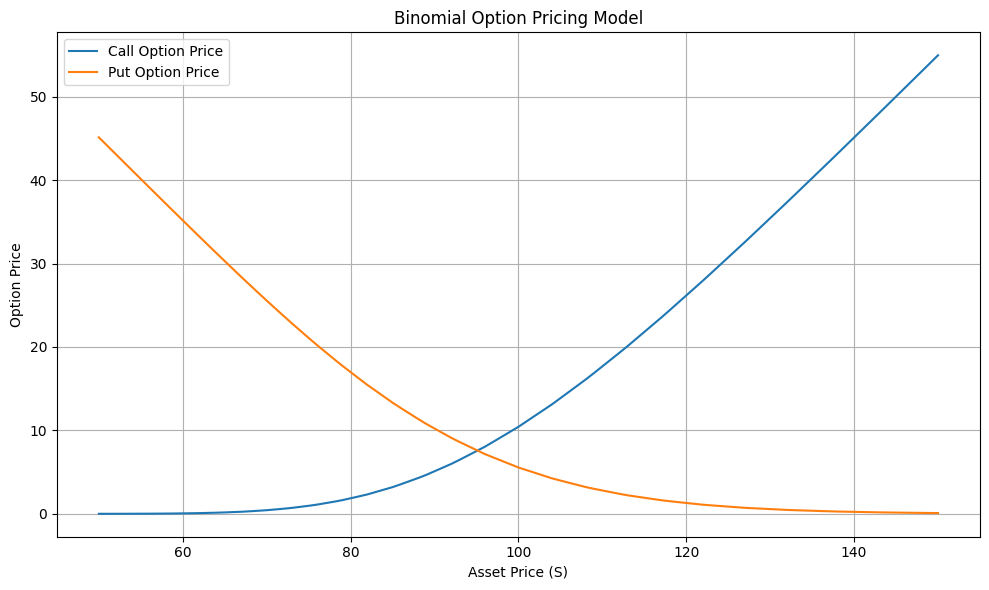

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_prices, label='Call Option Price')
plt.plot(S_range, put_prices, label='Put Option Price')
plt.title('Binomial Option Pricing Model')
plt.xlabel('Asset Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()